In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

training_set = train_datagen.flow_from_directory(
    'data/train',
    target_size = (48, 48),
    batch_size = 32,
    color_mode = "grayscale",
    class_mode = 'categorical'
)

Found 28709 images belonging to 7 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory(
    'data/test',
    target_size = (48, 48),
    batch_size = 32,
    color_mode = "grayscale",
    class_mode = 'categorical'
)

Found 7178 images belonging to 7 classes.


In [ ]:
cnn = tf.keras.models.Sequential(
    [
        tf.keras.layers.Input([48,48,1]),
        tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
        tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=128, activation='relu'),
        tf.keras.layers.Dense(units=7, activation='softmax'),
    ]
)

In [94]:
cnn.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [95]:
cnn.fit(x=training_set, validation_data=test_set, epochs = 50)

Epoch 1/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 60s 63ms/step - accuracy: 0.3179 - loss: 1.8497 - val_accuracy: 0.3819 - val_loss: 1.6605
Epoch 2/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 57s 63ms/step - accuracy: 0.4267 - loss: 1.4688 - val_accuracy: 0.3097 - val_loss: 1.6952
Epoch 3/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 55s 61ms/step - accuracy: 0.4560 - loss: 1.3952 - val_accuracy: 0.3938 - val_loss: 1.9031
Epoch 4/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 58s 65ms/step - accuracy: 0.4872 - loss: 1.3316 - val_accuracy: 0.4852 - val_loss: 1.3516
Epoch 5/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 55s 61ms/step - accuracy: 0.5033 - loss: 1.2928 - val_accuracy: 0.4629 - val_loss: 1.4192
Epoch 6/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 58s 64ms/step - accuracy: 0.5278 - loss: 1.2456 - val_accuracy: 0.5102 - val_loss: 1.2936
Epoch 7/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 58s 64ms/step - accuracy: 0.5363 - loss: 1.2203 - val_accuracy: 0.5163 - val_loss: 1.2617
Epoch 8/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 56s 63ms/step - accuracy: 0.5434 - loss: 1.1944 - 

In [96]:
training_set.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [99]:
cnn.save('FERclassifier.keras')

In [126]:
from tensorflow.keras.preprocessing import image
import numpy as np
import os

new_cnn = tf.keras.models.load_model('FERclassifier.keras')

i = 0
count = 0

for filename in os.listdir("data/test/happy"):
    if i == 100:
        break

    file_path = os.path.join("data/test/happy", filename)
    
    test_image = image.load_img(file_path, target_size = (48, 48, 1))
    grayscale_tensor = tf.image.rgb_to_grayscale(test_image)
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(grayscale_tensor, axis = 0)

    result = new_cnn.predict(test_image)
    predicted_class = np.argmax(result, axis=1)[0]

    print(f"Predicted Class: {predicted_class}")

    if predicted_class == 3:
        count += 1

    i += 1

print(f"{count} observations correct")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
Predicted Class: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted Class: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicted Class: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted Class: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted Class: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted Class: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted Class: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted Class: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted Class: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted Class: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted Class: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted Class: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted Class: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted Class: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted Class: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted Class: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted Class: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


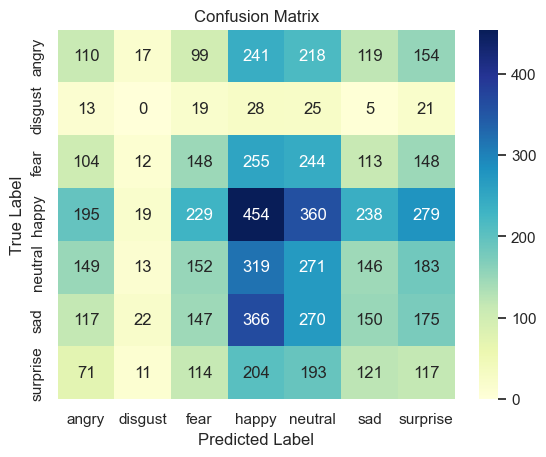

In [127]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Get the true labels and predicted labels for the validation set
validation_labels = test_set.classes
validation_pred_probs = new_cnn.predict(test_set)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
class_names = list(training_set.class_indices.keys())

sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [141]:
from sklearn.metrics import classification_report, accuracy_score

test_loss, test_accuracy = cnn.evaluate(test_set, verbose=1)
print(f"Test Accuracy (Direct Evaluation): {test_accuracy * 100:.2f}%")

# Manual Calculation
predictions = cnn.predict(test_set, verbose=1)
predicted_classes = predictions.argmax(axis=1)  # Predicted class indices
true_classes = test_set.classes  # True class indices
class_labels = list(test_set.class_indices.keys())  # Class labels

# Accuracy and Report
print(f"Calculated Accuracy: {accuracy_score(true_classes, predicted_classes) * 100:.2f}%")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5601 - loss: 1.4117
Test Accuracy (Direct Evaluation): 56.71%
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Calculated Accuracy: 17.32%
              precision    recall  f1-score   support

       angry       0.15      0.12      0.13       958
     disgust       0.03      0.03      0.03       111
        fear       0.16      0.14      0.15      1024
       happy       0.24      0.25      0.25      1774
     neutral       0.16      0.21      0.18      1233
         sad       0.18      0.13      0.15      1247
    surprise       0.11      0.14      0.12       831

    accuracy                           0.17      7178
   macro avg       0.15      0.15      0.14      7178
weighted avg       0.17      0.17      0.17      7178

